In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn

(21,)
(20, 1)
(20, 1)


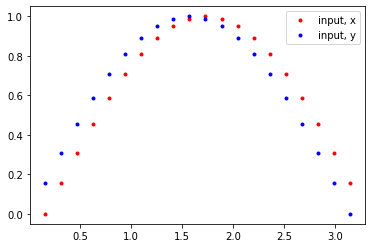

In [31]:
seq_length = 20
time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length + 1, 1))
#print(data.shape)

x = data[:-1]
y = data[1:]

print(time_steps.shape)
print(x.shape)
print(y.shape)

plt.plot(time_steps[1:], x, 'r.', label = 'input, x')
plt.plot(time_steps[1:], y, 'b.', label = 'input, y')
plt.legend()
plt.show()


In [32]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super().__init__()
        
        self.hidden_dim = hidden_dim
        #batch_first means that the first dimension of the input and output will be the batch_size
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first = True)
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        #x (batch_size, seq_length, input_size)
        #hidden from rnn as well as the input hidden (n_layers, batch_size, hidden_dim)
        #r_out from rnn (batch_size, seq_length, hidden_dim)
        batch_size = x.size(0)
        
        r_out, hidden = self.rnn(x, hidden)
        #reshape output to be (batch_size*seq_length, hidden_dim)
        r_out = r_out.view(-1, self.hidden_dim)
        output = self.fc(r_out)l
        
        return output, hidden

SyntaxError: invalid syntax (<ipython-input-32-4db53b317ea2>, line 19)

In [33]:
test_rnn = RNN(input_size = 1, output_size = 1, hidden_dim = 10, n_layers = 2)

time_steps = time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data.resize((seq_length, 1)) #2 x 1

test_input = torch.Tensor(data).unsqueeze(0)
print(test_input.shape) #1 x 20 x 1
test_out, test_h = test_rnn.forward(test_input, None)

print(test_out.shape) #20 x 1
print(test_h.shape) # 



torch.Size([1, 20, 1])
torch.Size([20, 1])
torch.Size([2, 1, 10])


In [34]:
#decide on hyperparameters
input_size = 1
output_size = 1
hidden_dim = 32
n_layers = 1

rnn = RNN(input_size, output_size, hidden_dim, n_layers)
print(rnn)

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [35]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=0.01)

In [36]:
def train(rnn, n_steps, print_every):
    
    hidden = None
    
    for batch_i, step in enumerate(range(n_steps)):
        
        time_steps = np.linspace(step*np.pi, (step+1)*np.pi, seq_length + 1)
        data = np.sin(time_steps)
        data.resize((seq_length+1, 1))
        
        x = data[:-1]
        y = data[1:]
        
        x_tensor = torch.Tensor(x).unsqueeze(0)
        y_tensor = torch.Tensor(y)
        
        prediction, hidden = rnn(x_tensor, hidden)
        
        hidden = hidden.data
        loss = criterion(prediction, y_tensor)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_i%print_every==0:
            print('Loss : ', loss.item())
            print('Input size = ', x_tensor.shape)
            print('Prediction size = ', prediction.shape)
            print('Target size = ', y_tensor.shape)
            plt.plot(time_steps[1:], x, 'r.')
            plt.plot(time_steps[1:], prediction.data.numpy().flatten(), 'b.')
            plt.show()
    return rnn
            
            
        
        
        

Loss :  0.5047014951705933
Input size =  torch.Size([1, 20, 1])
Prediction size =  torch.Size([20, 1])
Target size =  torch.Size([20, 1])


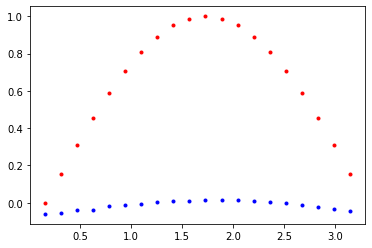

Loss :  0.010569549165666103
Input size =  torch.Size([1, 20, 1])
Prediction size =  torch.Size([20, 1])
Target size =  torch.Size([20, 1])


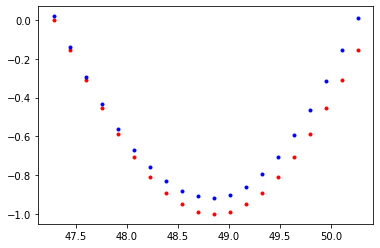

Loss :  0.0007415199652314186
Input size =  torch.Size([1, 20, 1])
Prediction size =  torch.Size([20, 1])
Target size =  torch.Size([20, 1])


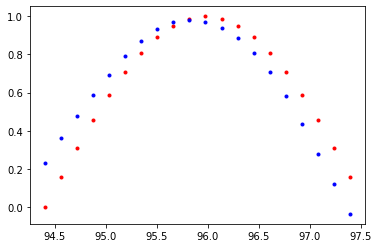

Loss :  0.00018029529019258916
Input size =  torch.Size([1, 20, 1])
Prediction size =  torch.Size([20, 1])
Target size =  torch.Size([20, 1])


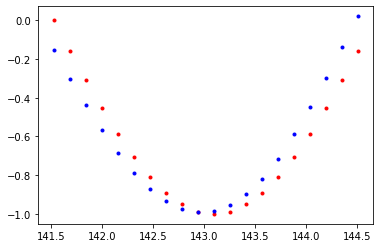

Loss :  0.00017256985302083194
Input size =  torch.Size([1, 20, 1])
Prediction size =  torch.Size([20, 1])
Target size =  torch.Size([20, 1])


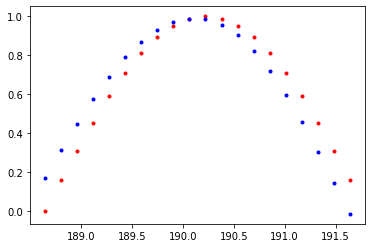

In [37]:
n_steps = 75
print_every = 15

trained_rnn = train(rnn, n_steps, print_every)